<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/ml_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [2]:
# Load dataset, specifying the encoding
df = pd.read_csv('/content/data.csv', encoding='latin-1') # Try 'latin-1' or 'cp1252'

# Display the first few rows of the dataset
df.head(11)


 Display the first few rows of the dataset
df.head(11)

# Check for missing values
df.isnull().sum()

df = df.dropna() #Now that df



IndentationError: unexpected indent (<ipython-input-2-6d5b5057333e>, line 8)

In [4]:
# Load dataset, specifying the encoding
df = pd.read_csv('/content/data.csv', encoding='latin-1') # Try 'latin-1' or 'cp1252'

# Display the first few rows of the dataset
df.head(11)

# Display the first few rows of the dataset #This was the problematic line, fixed by removing extra spaces before it
df.head(11)

# Check for missing values
df.isnull().sum()

df = df.dropna() #Now that df

In [5]:
# One-hot encode the 'Country' column (because it's categorical)
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Check the dataframe after encoding
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# Create the target variable 'MadePurchase'
df['MadePurchase'] = df['Quantity'].apply(lambda x: 1 if x > 0 else 0)


In [7]:
# Define features (X) and target (y)
X = df.drop(['MadePurchase'], axis=1)  # All features except the target column 'MadePurchase'
y = df['MadePurchase']  # The target variable, which indicates whether the customer made a purchase


In [8]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Standardize the data (optional but recommended)
scaler = StandardScaler()

# Select only numeric features for scaling
numeric_features = X_train.select_dtypes(include=np.number).columns
X_train_scaled = X_train.copy()  # Create a copy to avoid modifying the original DataFrame
X_test_scaled = X_test.copy()

# Fit and transform on numeric features only
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Drop non-numeric columns from X_train_scaled and X_test_scaled
# Get a list of non-numeric columns
non_numeric_features = X_train_scaled.select_dtypes(exclude=np.number).columns

# Drop the non-numeric columns
X_train_scaled = X_train_scaled.drop(columns=non_numeric_features)
X_test_scaled = X_test_scaled.drop(columns=non_numeric_features)



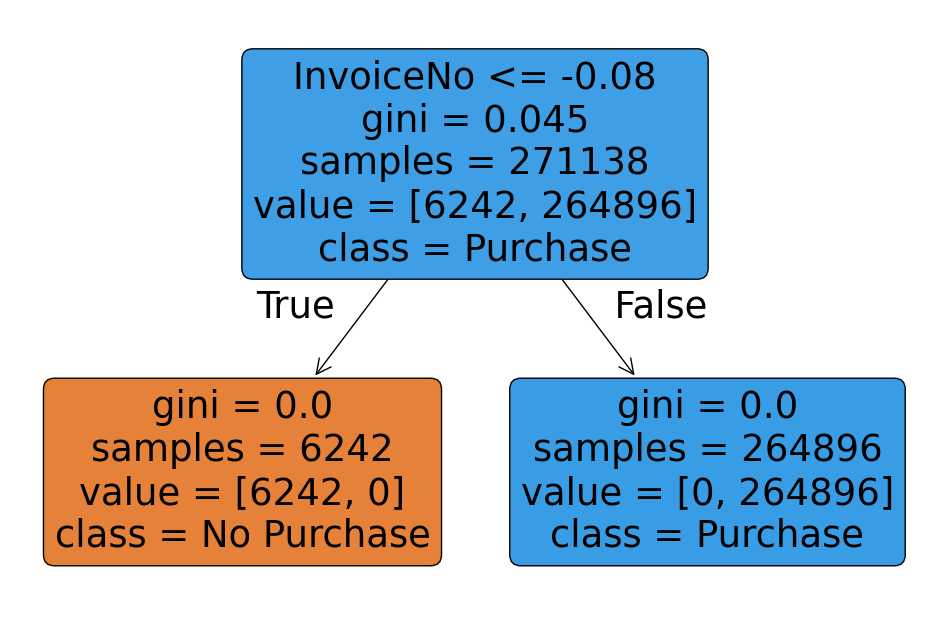

In [10]:
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)  # Fit the model with your training data

# Now you can visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], rounded=True)
plt.show()


In [11]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


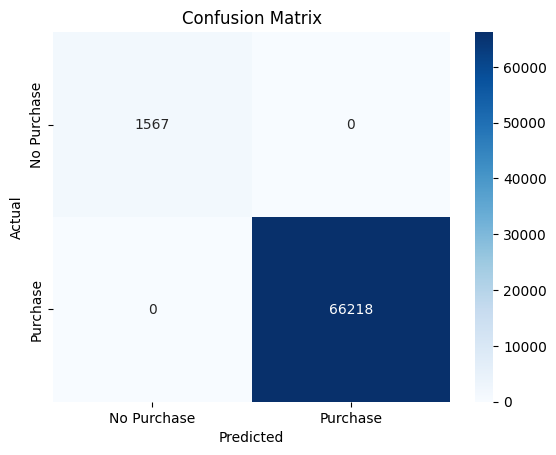

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1567
           1       1.00      1.00      1.00     66218

    accuracy                           1.00     67785
   macro avg       1.00      1.00      1.00     67785
weighted avg       1.00      1.00      1.00     67785



In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [13]:
# Initialize the model with hyperparameters
clf_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Train the model on the training data
clf_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tuned = clf_tuned.predict(X_test_scaled)

# Evaluate the performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")



Tuned Model Accuracy: 1.0000
